In [1]:
import vipy

In [2]:
# Load the public keynet and the public sensor
(ksensor, knet) = vipy.util.load('keynet_challenge_lenet_10AUG20.pkl')

# The keynet was constructed from a source LeNet model, with private layer keys.  
# The keynet is available to you for inspection
# The weights for the source LeNet model are not available to you, but the topology is available:
# https://github.com/visym/keynet/blob/master/keynet/mnist.py#L49-L63
print(knet)

# The keyed sensor was constructed using a private image key
# The image key is not available to you.
# The output of the keyed sensor is available to you in the image 'keynet_challenge_lenet_10AUG20.png'
# We provide an PublicKeyedSensor object that will marshal an encrypted image for keynet encoding
print(ksensor)

Sequential(
  (conv1): KeyedLayer(<Conv2d: in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, backend=scipy, shape=(4705, 785), nnz=45049>>)
  (relu1): ReLU()
  (pool1): KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(1177, 4705), nnz=11263>>)
  (conv2): KeyedLayer(<Conv2d: in_channels=6, out_channels=16, kernel_size=(3, 3), stride=1, backend=scipy, shape=(3137, 1177), nnz=156737>>)
  (relu2): ReLU()
  (pool2): KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(785, 3137), nnz=7185>>)
  (fc1): KeyedLayer(<Linear: in_features=784, out_features=120, backend=scipy, shape=(121, 785), nnz=94201>>)
  (relu3): ReLU()
  (fc2): KeyedLayer(<Linear: in_features=120, out_features=84, backend=scipy, shape=(85, 121), nnz=10165>>)
  (relu4): ReLU()
  (fc3): KeyedLayer(<Linear: in_features=84, out_features=10, backend=scipy, shape=(11, 85), nnz=851>>)
)
<PublicKeyedSensor: height=28, width=28, channels=1>


In [3]:
# The challenge image has been encrypted with a private image key that is not available to you
im = vipy.image.Image('keynet_challenge_lenet_10AUG20.png').load()
print(im)

<vipy.image: height=28, width=28, color=rgb, filename="keynet_challenge_lenet_10AUG20.png">


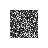

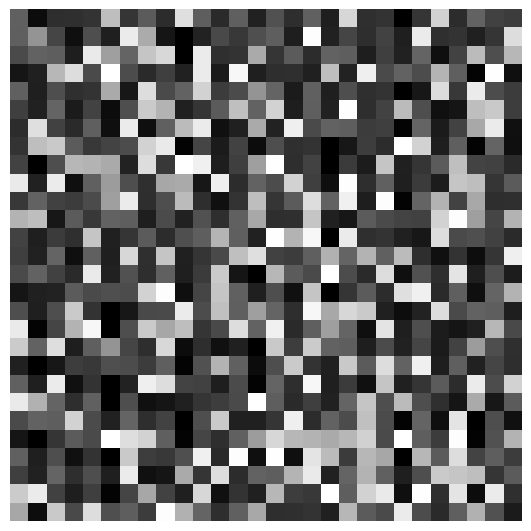

<vipy.image: height=512, width=512, color=rgb, filename="keynet_challenge_lenet.png">

In [4]:
# You can inspect the encrypted image. 
# This image is 28x28x1 for input to a lenet style network
im.show()

# This can also be visualized as a larger image
im.clone().maxdim(512, interp='nearest').show()

In [5]:
# Load this image, and perform a forward pass through the keynet returning a public encoding
yh = knet.forward(ksensor.load('keynet_challenge_lenet.png').tensor())

[keynet.layer]: forward <PublicKeyedSensor: height=28, width=28, channels=1>
[keynet.layer]: forward KeyedLayer(<Conv2d: in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, backend=scipy, shape=(4705, 785), nnz=45049>>)
[keynet.layer]: forward KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(1177, 4705), nnz=11263>>)
[keynet.layer]: forward KeyedLayer(<Conv2d: in_channels=6, out_channels=16, kernel_size=(3, 3), stride=1, backend=scipy, shape=(3137, 1177), nnz=156737>>)
[keynet.layer]: forward KeyedLayer(<AvgPool2d: kernel_size=3, stride=2, backend=scipy, shape=(785, 3137), nnz=7185>>)
[keynet.layer]: forward KeyedLayer(<Linear: in_features=784, out_features=120, backend=scipy, shape=(121, 785), nnz=94201>>)
[keynet.layer]: forward KeyedLayer(<Linear: in_features=120, out_features=84, backend=scipy, shape=(85, 121), nnz=10165>>)
[keynet.layer]: forward KeyedLayer(<Linear: in_features=84, out_features=10, backend=scipy, shape=(11, 85), nnz=851>>)


In [6]:
# Your task is to recover the secret message in 'keynet_challenge_lenet.png' 
# given only the image, the public keynet output and the public keynet
(public_image, public_encoding, public_keynet) = (im.numpy(), yh, knet)
print('Public Image: %s\n' % str(public_image))
print('Public Encoding: %s\n' % str(public_encoding))
print('Public keynet: %s\n' % str(public_keynet))

# The secret message will tell you how to notify us that you succeeded!  Good luck!

Public Image: [[[ 96  96  96]
  [ 12  12  12]
  [ 46  46  46]
  ...
  [ 98  98  98]
  [ 65  65  65]
  [ 60  60  60]]

 [[ 95  95  95]
  [148 148 148]
  [ 69  69  69]
  ...
  [ 32  32  32]
  [ 53  53  53]
  [221 221 221]]

 [[ 74  74  74]
  [ 98  98  98]
  [ 94  94  94]
  ...
  [187 187 187]
  [ 78  78  78]
  [183 183 183]]

 ...

 [[ 63  63  63]
  [ 33  33  33]
  [100 100 100]
  ...
  [190 190 190]
  [ 53  53  53]
  [ 91  91  91]]

 [[203 203 203]
  [235 235 235]
  [ 65  65  65]
  ...
  [ 12  12  12]
  [235 235 235]
  [ 47  47  47]]

 [[167 167 167]
  [ 13  13  13]
  [201 201 201]
  ...
  [177 177 177]
  [ 81  81  81]
  [ 27  27  27]]]

Public Encoding: tensor([[[ 0.7802]],

        [[-0.6160]],

        [[ 0.5948]],

        [[-0.6935]],

        [[-0.0941]],

        [[-0.2036]],

        [[-0.0465]],

        [[ 0.7052]],

        [[-0.0140]],

        [[-0.5587]]])

Public keynet: Sequential(
  (conv1): KeyedLayer(<Conv2d: in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1